# OGR for Vector Processing: In\-class live coding and exercises



## Prerequisites



### Is GDAL installed

In [1]:
import sys
try:
    from osgeo import ogr, osr, gdal
    print("Installed!")
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')

Installed!


## Visualization of vector data

In [2]:

import os
import matplotlib.pyplot as plt
from osgeo import ogr

# This is the function from listing 11.2.
def plot_polygon(poly, symbol='k-', fig=None, ax=None, fill=False, **kwargs):
    """Plots a polygon using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    if not fill:
        for i in range(poly.GetGeometryCount()):
            subgeom = poly.GetGeometryRef(i)
            x, y = zip(*subgeom.GetPoints())
            ax.plot(x, y, symbol, **kwargs)
    else:
        for i in range(poly.GetGeometryCount()):
            x, y = zip(*poly.GetGeometryRef(i).GetPoints())
            plt.fill(x, y, symbol, **kwargs)

# This function is new.
def plot_line(line, symbol='k-', fig=None, ax=None, fill=False, **kwargs):
    """Plots a line using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    x, y = zip(*line.GetPoints())
    ax.plot(x, y, symbol, **kwargs)

# This function is new.
def plot_point(point, fig=None, ax=None, symbol='ko', **kwargs):
    """Plots a point using the given symbol."""
    
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

    x, y = point.GetX(), point.GetY()
    ax.plot(x, y, symbol, **kwargs)


def plot_feature(feature, symbol, fig=None, ax=None, fill=False, **kwargs):
    """Plots an OGR feature using the given symbol."""

    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

    geom = feature.geometry()
    geom_type = geom.GetGeometryType()

    # Polygons
    if geom_type == ogr.wkbPolygon:
        plot_polygon(geom, symbol, fig=fig, ax=ax, fill=fill, **kwargs)

    # Multipolygons
    elif geom_type == ogr.wkbMultiPolygon:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_polygon(subgeom, symbol, fig=fig, ax=ax, fill=fill, **kwargs)

    # Lines
    elif geom_type == ogr.wkbLineString:
        plot_line(geom, symbol, fig=fig, ax=ax, **kwargs)

    # Multilines
    elif geom_type == ogr.wkbMultiLineString:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_line(subgeom, symbol, fig=fig, ax=ax, **kwargs)

    # Points
    elif geom_type == ogr.wkbPoint:
        plot_point(geom, symbol, fig=fig, ax=ax, **kwargs)

    # Multipoints
    elif geom_type == ogr.wkbMultiPoint:
        for i in range(geom.GetGeometryCount()):
            subgeom = geom.GetGeometryRef(i)
            plot_point(subgeom, symbol, fig=fig, ax=ax, **kwargs)

def plot_layer(layer, symbol, fig=None, ax=None, **kwargs):
    """Plots an OGR layer using the given symbol."""
    if fig is None or ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    for feature in layer:
        plot_feature(feature, symbol, fig, ax, kwargs)

        

## Datasource

### How to open a vector datasource

In [53]:
import os

datasource_path =r'/home/user/Handouts/exercise_data_vector/NL_provinces.shp'
if os.path.exists(datasource_path):
    print("File is avaiable")
else:
    print("File is not available")

File is not available


**Exercise 1: Load the shapefile**

In [54]:
from osgeo import ogr
import os

datasource_path = 'data/NL_provinces.shp'

# YOUR CODE HERE
datasource = ogr.Open(datasource_path)

if datasource is not None:
    print("file opened!")
else:
    print('No data source!')

file opened!


### Access to datasource properties

What type of driver? ShapeFile? Idrisi? PostgreSQL?

In [64]:

driverType = datasource.GetDriver().GetName()
print("Driver name:", driverType)

Driver name: ESRI Shapefile


**Exercise 2: print the number of layers in the data source** 

In [56]:
# YOUR CODE HERE

datasource.GetLayerCount()

1

## Working with Layers

Obtaining a layer form the datasource

In [65]:
layer = datasource.GetLayer(0)

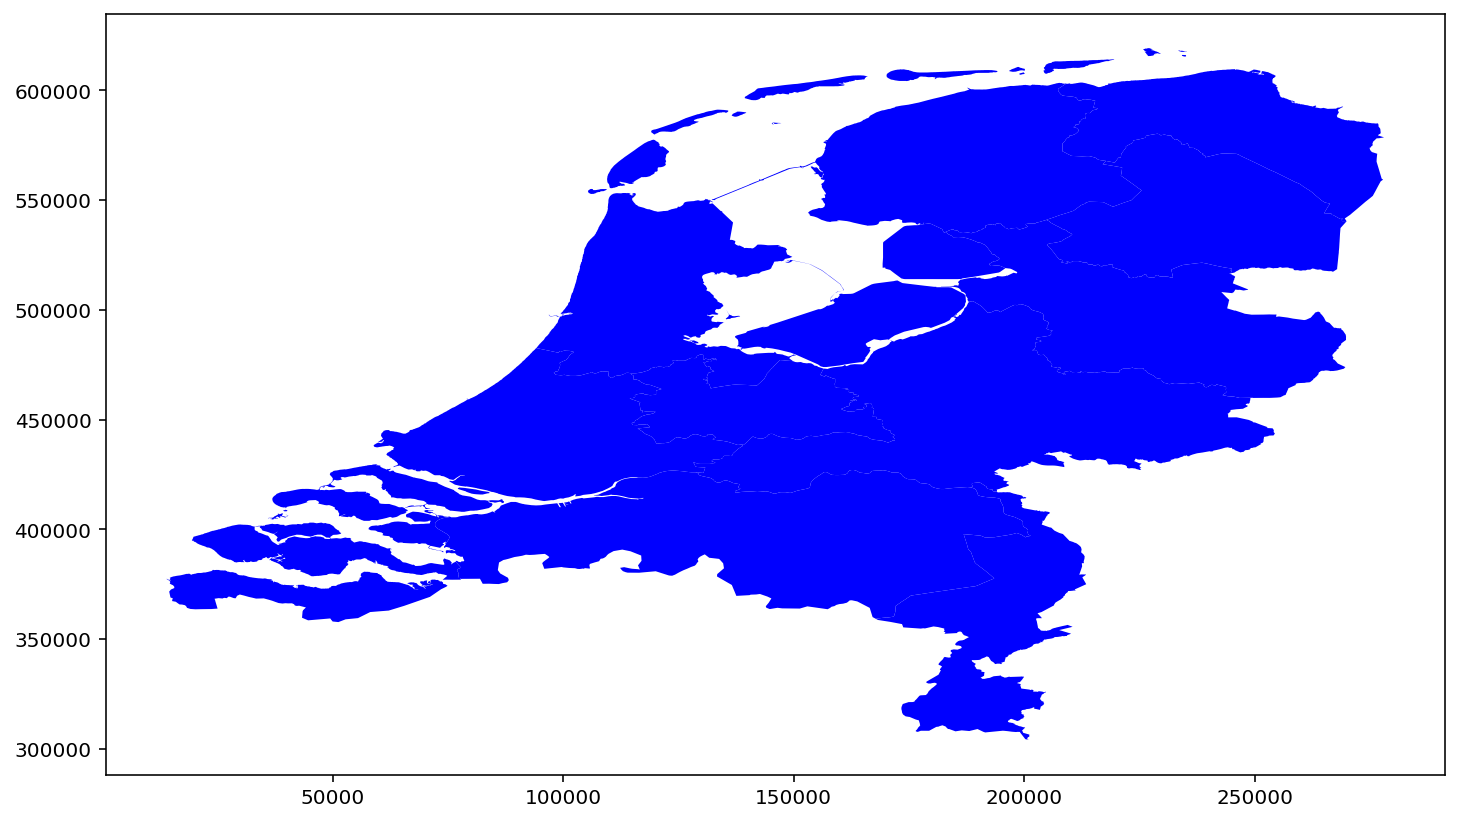

In [58]:
plot_layer(layer, 'b-', c='black')

Obtaining attribute field names

**Exercise 3: print the name of the fields**

In [59]:
# get layer definition
layerDefinition = layer.GetLayerDefn()
# get number of fields
fieldCount = layerDefinition.GetFieldCount()
print('Number of fields: ' + str(fieldCount))

# YOUR CODE HERE
# range(fieldCount)
for i in range(fieldCount):
    print("field:", layerDefinition.GetFieldDefn(i).GetName())

Number of fields: 4
field: OBJECTID
field: NAME_1
field: HASC_1
field: ENGTYPE_1


Getting layer extent
note: not feature extents



In [4]:
layerExtents=layer.GetExtent()
print("x_min = %.2f x_max = %.2f y_min = %.2f y_max = %.2f" % (layerExtents[0], layerExtents[1], layerExtents[2], layerExtents[3]))

NameError: name 'layer' is not defined

Obtaining the spatial reference system

In [61]:
layerSRS=layer.GetSpatialRef()
print ('Spatial Reference System (srs): '+str(layerSRS))

Spatial Reference System (srs): PROJCS["Amersfoort / RD New",
    GEOGCS["Amersfoort",
        DATUM["Amersfoort",
            SPHEROID["Bessel 1841",6377397.155,299.1528128,
                AUTHORITY["EPSG","7004"]],
            AUTHORITY["EPSG","6289"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4289"]],
    PROJECTION["Oblique_Stereographic"],
    PARAMETER["latitude_of_origin",52.1561605555556],
    PARAMETER["central_meridian",5.38763888888889],
    PARAMETER["scale_factor",0.9999079],
    PARAMETER["false_easting",155000],
    PARAMETER["false_northing",463000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","28992"]]


**Exercise 4: Obtaining the number of features**

In [62]:
### BEGIN SOLUTION
layerFeatureNum=layer.GetFeatureCount()
print ('Number of features: '+ str(layerFeatureNum))
### END SOLUTION

Number of features: 12


## Working with Features



Iterate over features \(e.g., get field values\)

For each feature in the layer we can use these functions

- extract the field value as a string
  ```python {kernel="python3"}
  feature.GetFieldAsString('FIELDNAME')
  ```

- extract the field value as a integer
  ```Python
  feature.GetFieldAsInteger('FIELDNAME')
  ```

- extract the field value as specified in the attribute table
  ```Python
  feature.GetField('FIELDNAME')
  ```



In [63]:
field_of_interest = 'NAME_1'
for feature in layer:
    nameFeature=feature.GetFieldAsString(field_of_interest)
#     print(F'{field_of_interest}: {nameFeature}')
    print(field_of_interest, " : ", nameFeature)

NAME_1  :  Utrecht
NAME_1  :  Zeeland
NAME_1  :  Zuid-Holland
NAME_1  :  Drenthe
NAME_1  :  Flevoland
NAME_1  :  Friesland
NAME_1  :  Gelderland
NAME_1  :  Groningen
NAME_1  :  Limburg
NAME_1  :  Noord-Brabant
NAME_1  :  Noord-Holland
NAME_1  :  Overijssel


Access to a single feature

- By index

**Exercise 5: print the name of the first feature in the layer**

In [31]:
# YOUR CODE HERE
feature = layer.GetFeature(0)
feature.GetFieldAsString(field_of_interest)

'Utrecht'

Access to a single feature

- Query by attribute

In [32]:
province_name = 'Overijssel'
query = F"{field_of_interest} = '{province_name}'"
print(query)

NAME_1 = 'Overijssel'


In [35]:
layer.SetAttributeFilter(query)
overijssel_feature = None
for feature in layer:
    print("1")
    overijssel_feature = feature

print(F"Code of {province_name}: {overijssel_feature.GetField('HASC_1')}")

1
Code of Overijssel: NL.OV


## Working with Geometries



Access to the feature geometry and envelope

**Exercise 6: extracting the ***Geometry*** of overijssel_feature and print its geometry name.**

In [38]:
overijssel_geometry = overijssel_feature.GetGeometryRef()
overijssel_geometry.GetGeometryName()

'POLYGON'

In [39]:
# geometry as text
# print('Geometry WKT : '+ overijssel_geometry.ExportToWkt()) 
print('Geometry WKT : '+ overijssel_geometry.ExportToWkt()[:300])

Geometry WKT : POLYGON ((205590.731890661 539885.447717943,206897.30217483 538389.194269776,206936.254419627 538350.129546603,207048.680703806 538238.833100527,207134.087120735 538153.994397344,207192.140397318 538096.457501079,207500.236711919 537790.721206487,208404.747577071 536692.989738908,208404.585641466 53


In [40]:
# geometry as json
# print('Geometry Json : '+ str(overijssel_geometry.ExportToJson()))
print('Geometry Json : '+ str(overijssel_geometry.ExportToJson())[:300])

Geometry Json : { "type": "Polygon", "coordinates": [ [ [ 205590.731890661001671, 539885.447717942879535 ], [ 206897.302174829994328, 538389.194269776344299 ], [ 206936.254419626580784, 538350.129546603071503 ], [ 207048.680703806167003, 538238.833100527408533 ], [ 207134.087120734504424, 538153.994397343951277 ], 


Access to the feature geometry and envelope

- Extraction of ***feature envelope*** (aka, extent/bounding box)

In [41]:
# get the envelope (bbox)
env = overijssel_geometry.GetEnvelope()
print("Feature extent: x_min = %.2f x_max = %.2f y_min = %.2f y_max = %.2f" % (env[0], env[1], env[2], env[3]))

Feature extent: x_min = 181922.20 x_max = 269798.68 y_min = 459839.00 y_max = 540983.45


Access to the feature's area size and length

**Exercise 7: print the area and length of the overijssel_geometry**

In [42]:
overijssel_geometry.Area()

3372864374.62524

## Spatial operators



### Spatial analysis

Creating a buffer of 5000 metters around Overijssel province



In [43]:
bufferDistance = 5000
buffer = overijssel_geometry.Buffer(bufferDistance)
buffer_area = buffer.Area()
print ('Buffer geometry WKT: ' + str(buffer.ExportToWkt())[:300])

Buffer geometry WKT: POLYGON ((180018.951756548 530899.844476256,179907.317339296 531016.137172313,179721.850533896 531220.331139595,179547.92706953 531434.442654286,179386.076321307 531657.820019924,179236.790918312 531889.783337352,178634.635790974 532884.704241152,178502.970956212 533115.92295644,178383.792658313 533


/tmp/ipykernel_1471/2151468976.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y, symbol, **kwargs)


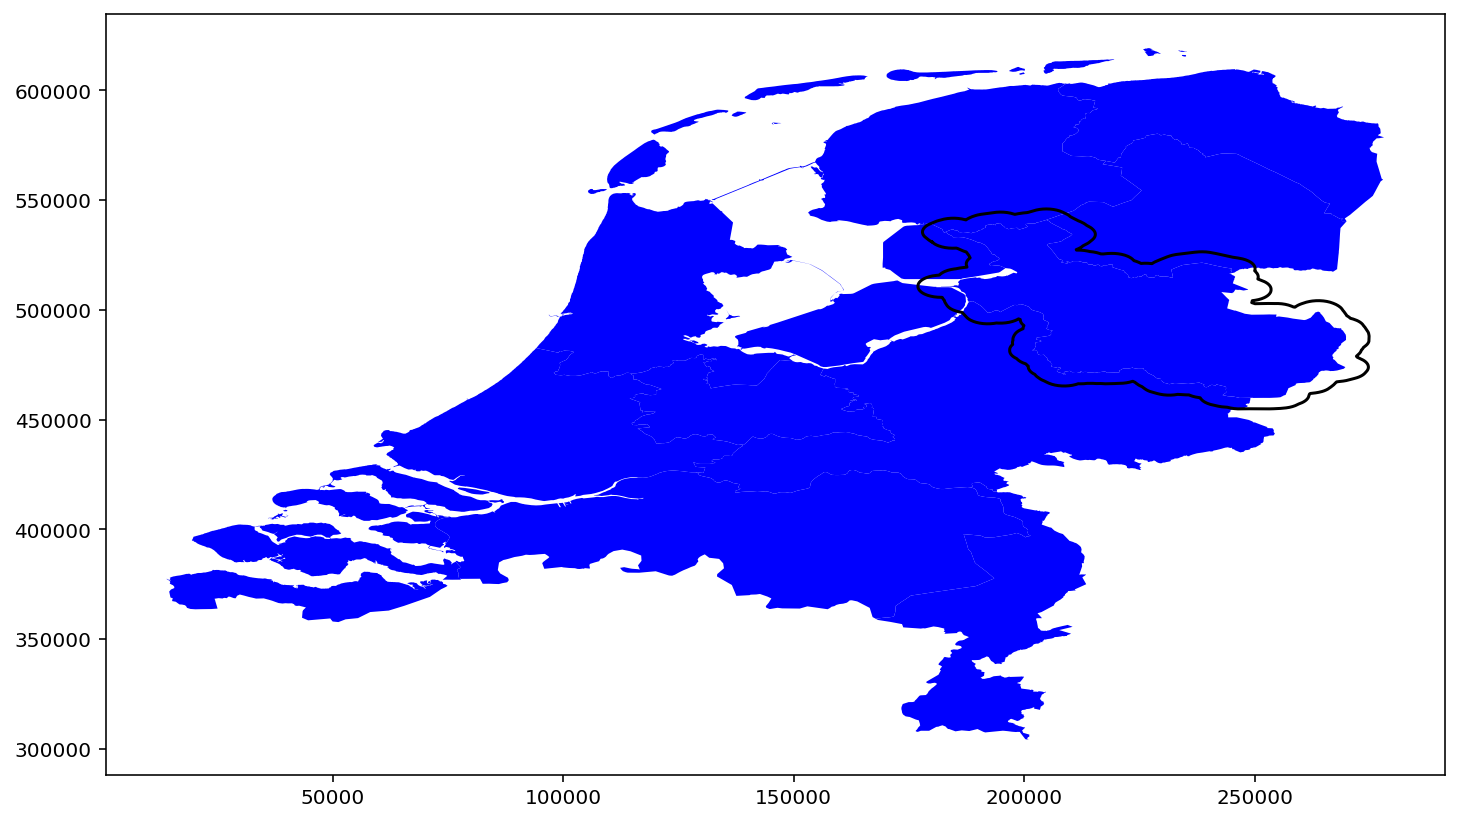

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
layer.SetAttributeFilter('')
plot_layer(layer, 'b-', c='black', fig=fig, ax=ax, zorder = 1)
# plot_feature(overijssel_feature, color='blue', symbol='k-', fig=fig, ax=ax)
plot_polygon(buffer, color='black', fig=fig, ax=ax, zorder = 2)

Intersection

1- Obtain Drenthe and Noord-Holland

/tmp/ipykernel_1471/2151468976.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.fill(x, y, symbol, **kwargs)


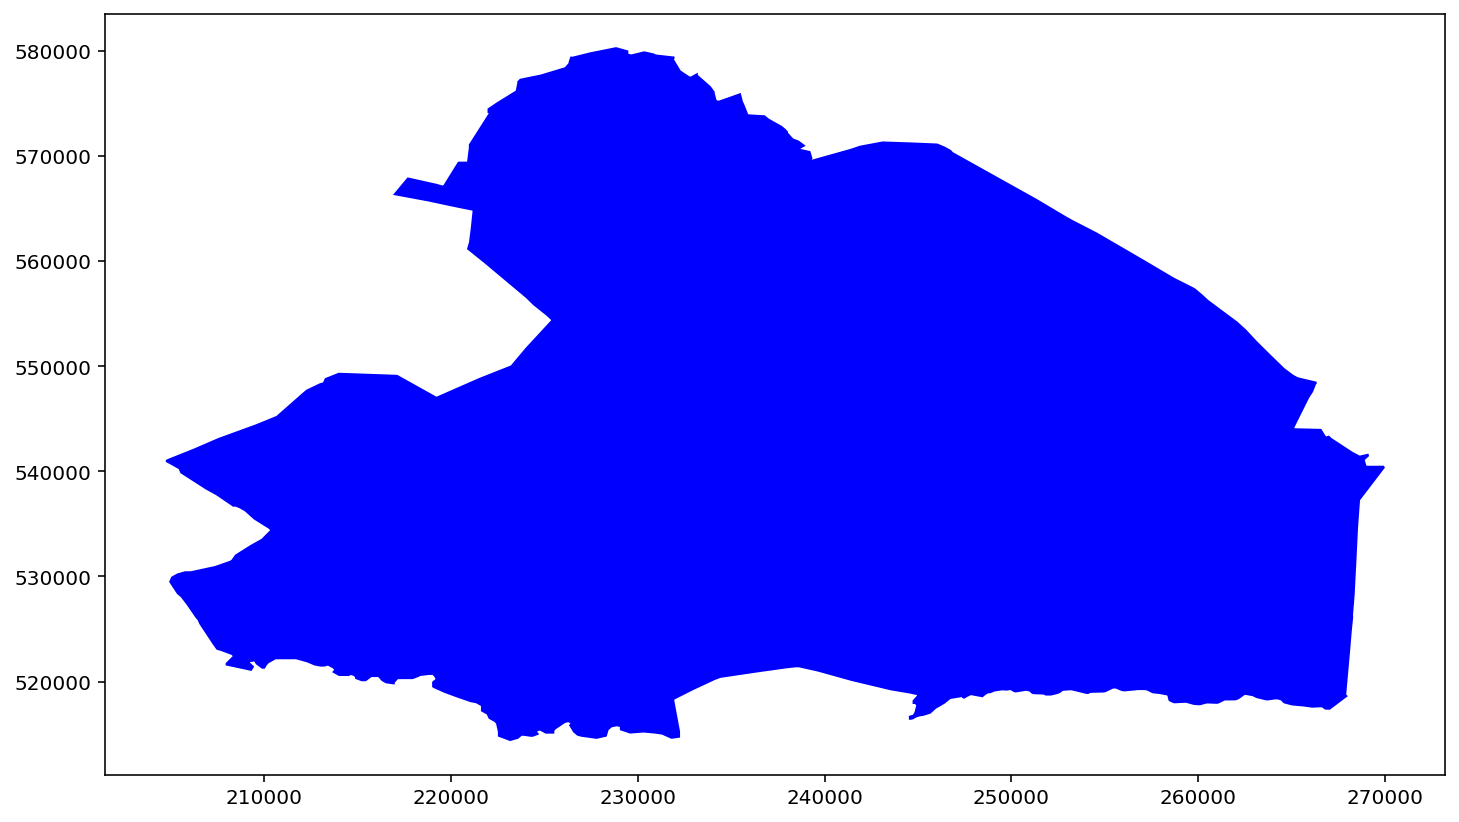

In [47]:
# effectively filters out all but one
province_name = 'Drenthe'
query = F"{field_of_interest} = '{province_name}'"
layer.SetAttributeFilter(query)

drenthe_feature = None 
for feature in layer:
    drenthe_feature=feature


plot_feature(drenthe_feature, symbol='b-', color='blue', fill=True)

/tmp/ipykernel_1471/2151468976.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.fill(x, y, symbol, **kwargs)


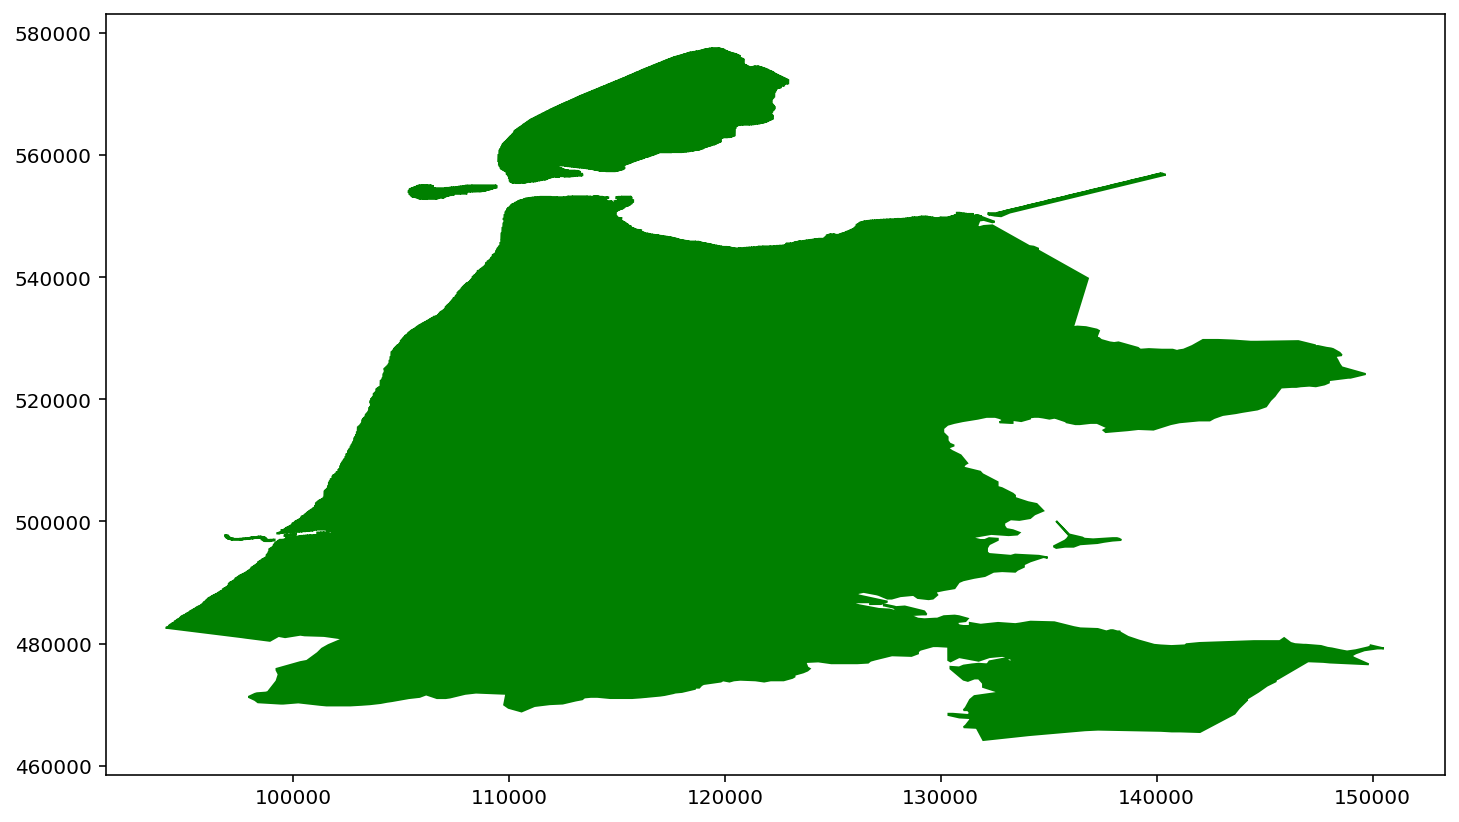

In [48]:
province_name = 'Noord-Holland'
query = F"{field_of_interest} = '{province_name}'"
layer.SetAttributeFilter(query)

noordholland_feature = None
for feature in layer:
    noordholland_feature = feature                                                                                                                      

plot_feature(noordholland_feature, symbol='b-', color='green', fill=True)

Access the geometries

In [49]:
drenthe_geometry = drenthe_feature.GetGeometryRef()
noordholand_geometry = noordholland_feature.GetGeometryRef()

**Exercise 8: does the Overijssel buffer intersect Drenthe?**

In [50]:
buffer.Intersects(drenthe_geometry)

True

**Exercise 9: Plot the intersection between Overijssel buffer and Drenthe**

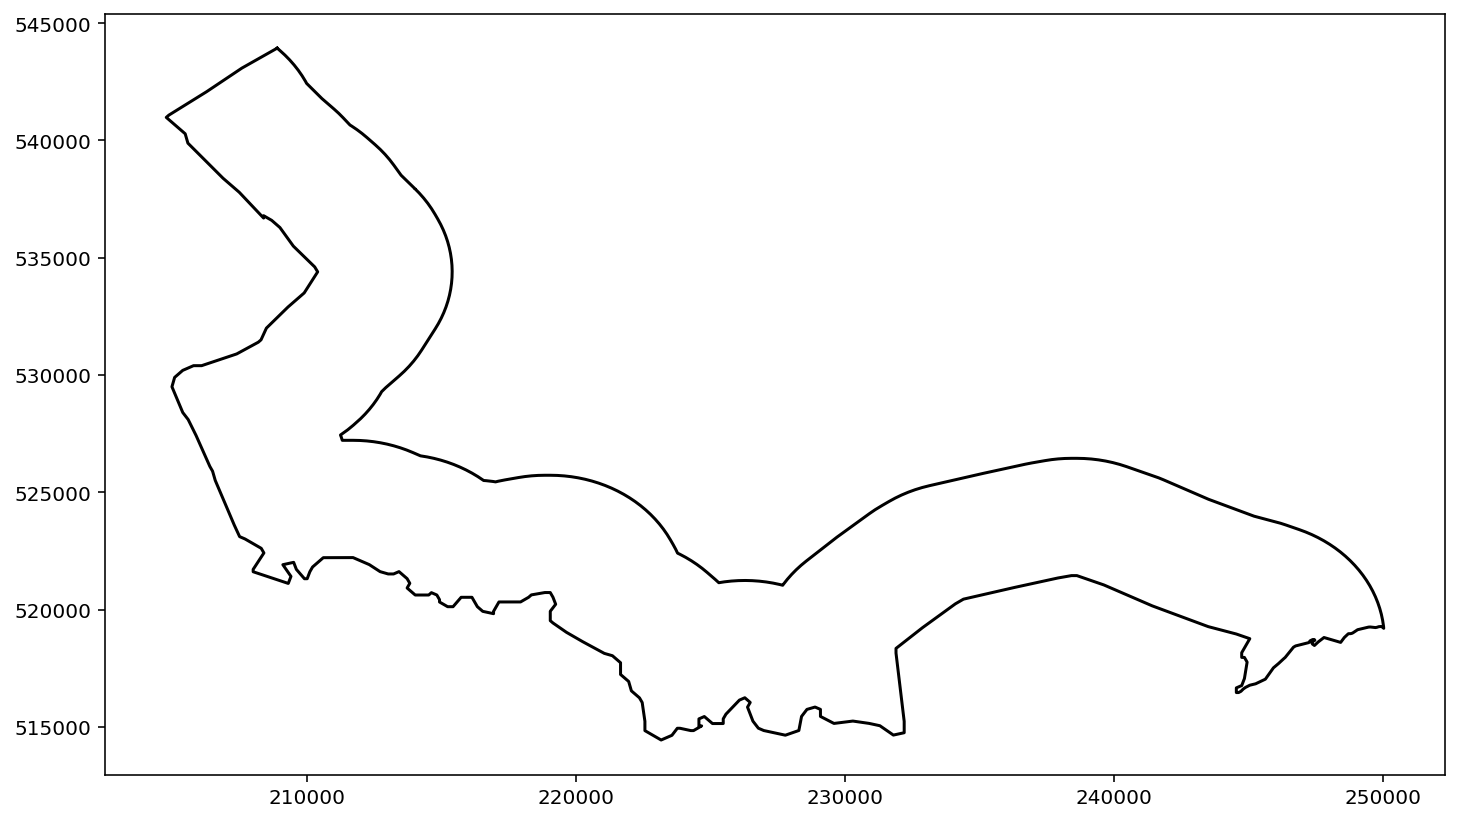

In [51]:
if buffer.Intersects(drenthe_geometry):
    intersection = buffer.Intersection(drenthe_geometry)
    plot_polygon(intersection)

In [ ]:
plot_polygon(intersection)

## Saving the outputs

In [52]:
from osgeo import osr

# set up the shapefile driver
driver = ogr.GetDriverByName("ESRI Shapefile")

# create the data source
data_source_path = "province_buffer.shp"
print(data_source_path)
data_source = driver.CreateDataSource(data_source_path)

# create the spatial reference, EPSG 28992
srs = osr.SpatialReference()
srs.ImportFromEPSG(28992)

# create the layer
layer = data_source.CreateLayer("province_buffer", srs, ogr.wkbPolygon)

# add the fields we're interested in
# let us add one field called Name
field_name = ogr.FieldDefn("Name", ogr.OFTString)
field_name.SetWidth(24)
layer.CreateField(field_name)

# let us add one more field called Area with type real
field_area = ogr.FieldDefn("Area", ogr.OFTReal)
field_area.SetWidth(32)
field_area.SetPrecision(2)  

# added line to set precision
layer.CreateField(field_area)

# create feature
feature = ogr.Feature(layer.GetLayerDefn())

# set field values
feature.SetField("Name", 'name1')
feature.SetField("Area", buffer_area)

# set geometry
feature.SetGeometry(buffer)

# add the feature to the layer
layer.CreateFeature(feature)

# dereference the feature 
feature = None

# save and close the data source
data_source = None

province_buffer.shp
